In [2]:
import numpy as np
import pydicom
from skimage import exposure
from matplotlib import pyplot as plt
import imageProcessing as imgProc

In [4]:
img = pydicom.dcmread('/mnt/d/ImagensDatasetFredrik/positive/00530_20990909_R_CC_1.dcm')
img = np.array(img.pixel_array)
nroBits = np.max(img)
imgArray = img

# Calculando o Histograma da Imagem 
* Obs: A imagem e 16bits, portanto a faixa de valores é muito maior que o normal de outras imagens, portante eh necessario calcular atraves de outras bibliotecas, opencv nao funciona.
#### # Histograma 
`Histograma eh um grafico de barras que demonstra uma distribuicao de frequencias de uma determinado tipo de variavel`
* No processamento de imagens:
- Representa um grafico de frequencias de intensidade de pixels na imagem. Representa o numero de pixels para cada intensidade de valor considerado.

## Normalização da Imagem: 
##### Equação:
$xnorm=\frac{x-xmin}{xmax-xmin}$

In [5]:
# Normalizando imagem
imgNormalized = imgArray/4095

In [6]:
imgEqHist = exposure.equalize_hist(imgNormalized, nbins=np.max(imgArray))
imgEqAdaptHist = exposure.equalize_adapthist(imgNormalized, nbins=np.max(imgArray), clip_limit=0.6)
#hist, bin = np.histogram(imgEqHst.ravel(), bins=bits, range=np.max(imgArray))

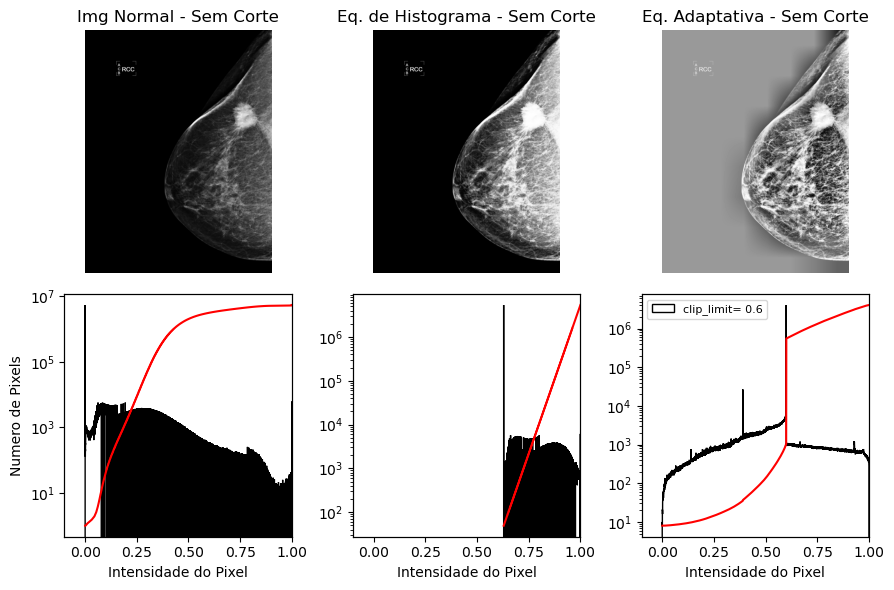

In [7]:
# Cria axis
fig, axes = imgProc.cria_Axis(plt.figure(figsize=(9, 6)))
  
# Imagem Normal, sem nenhuma Equalizacao
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgNormalized, axes[:, 0])
axeImg.set_title('Img Normal - Sem Corte')
axeHist.set_ylabel('Numero de Pixels')

# Imagem com Equalizacao de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqHist, axes[:, 1])
axeImg.set_title('Eq. de Histograma - Sem Corte')

# Imagem com Equalizacao Adaptativa de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqAdaptHist, axes[:, 2])
axeImg.set_title('Eq. Adaptativa - Sem Corte')
axeHist.legend(['clip_limit= 0.6'], fontsize=8,loc=2)

fig.tight_layout()
plt.show()

In [8]:
# Cortando imagem
imgArray = imgProc.croped_Img_With_Threshold(img)
# Normalizar
imgNormalized = imgArray/4095

# Equalizacao Histograma
clipLimit = 0.1
imgEqHist = exposure.equalize_hist(imgNormalized, nbins=np.max(imgArray))
imgEqAdaptHist = exposure.equalize_adapthist(imgNormalized, nbins=np.max(imgArray), clip_limit=clipLimit)

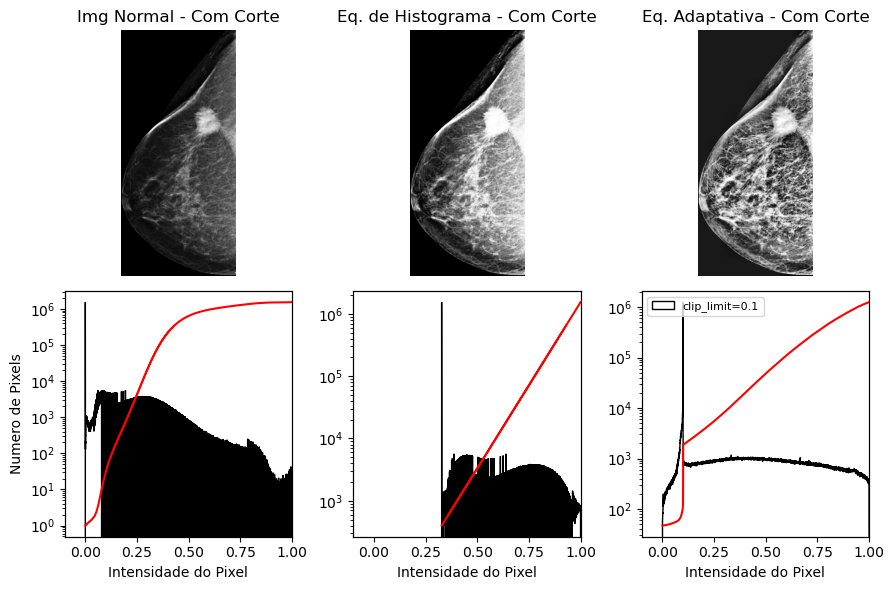

In [9]:
# Axis
fig, axes = imgProc.cria_Axis(plt.figure(figsize=(9, 6)))

# Imagem Normal, sem nenhuma Equalizacao
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgNormalized, axes[:, 0])
axeImg.set_title('Img Normal - Com Corte')
axeHist.set_ylabel('Numero de Pixels')

# Imagem com Equalizacao de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqHist, axes[:, 1])
axeImg.set_title('Eq. de Histograma - Com Corte')

# Imagem com Equalizacao Adaptativa de Histograma
axeImg, axeHist, axeCdf = imgProc.plot_Img_And_Hist(imgEqAdaptHist, axes[:, 2])
axeImg.set_title('Eq. Adaptativa - Com Corte')
axeHist.legend(['clip_limit={0}'.format(clipLimit)], fontsize=8,loc=2)

fig.tight_layout()
plt.show()

In [40]:
images = list(map(lambda i: exposure.equalize_adapthist(imgNormalized, nbins=np.max(imgArray), clip_limit=clipLimit[i]),range(0,9)))

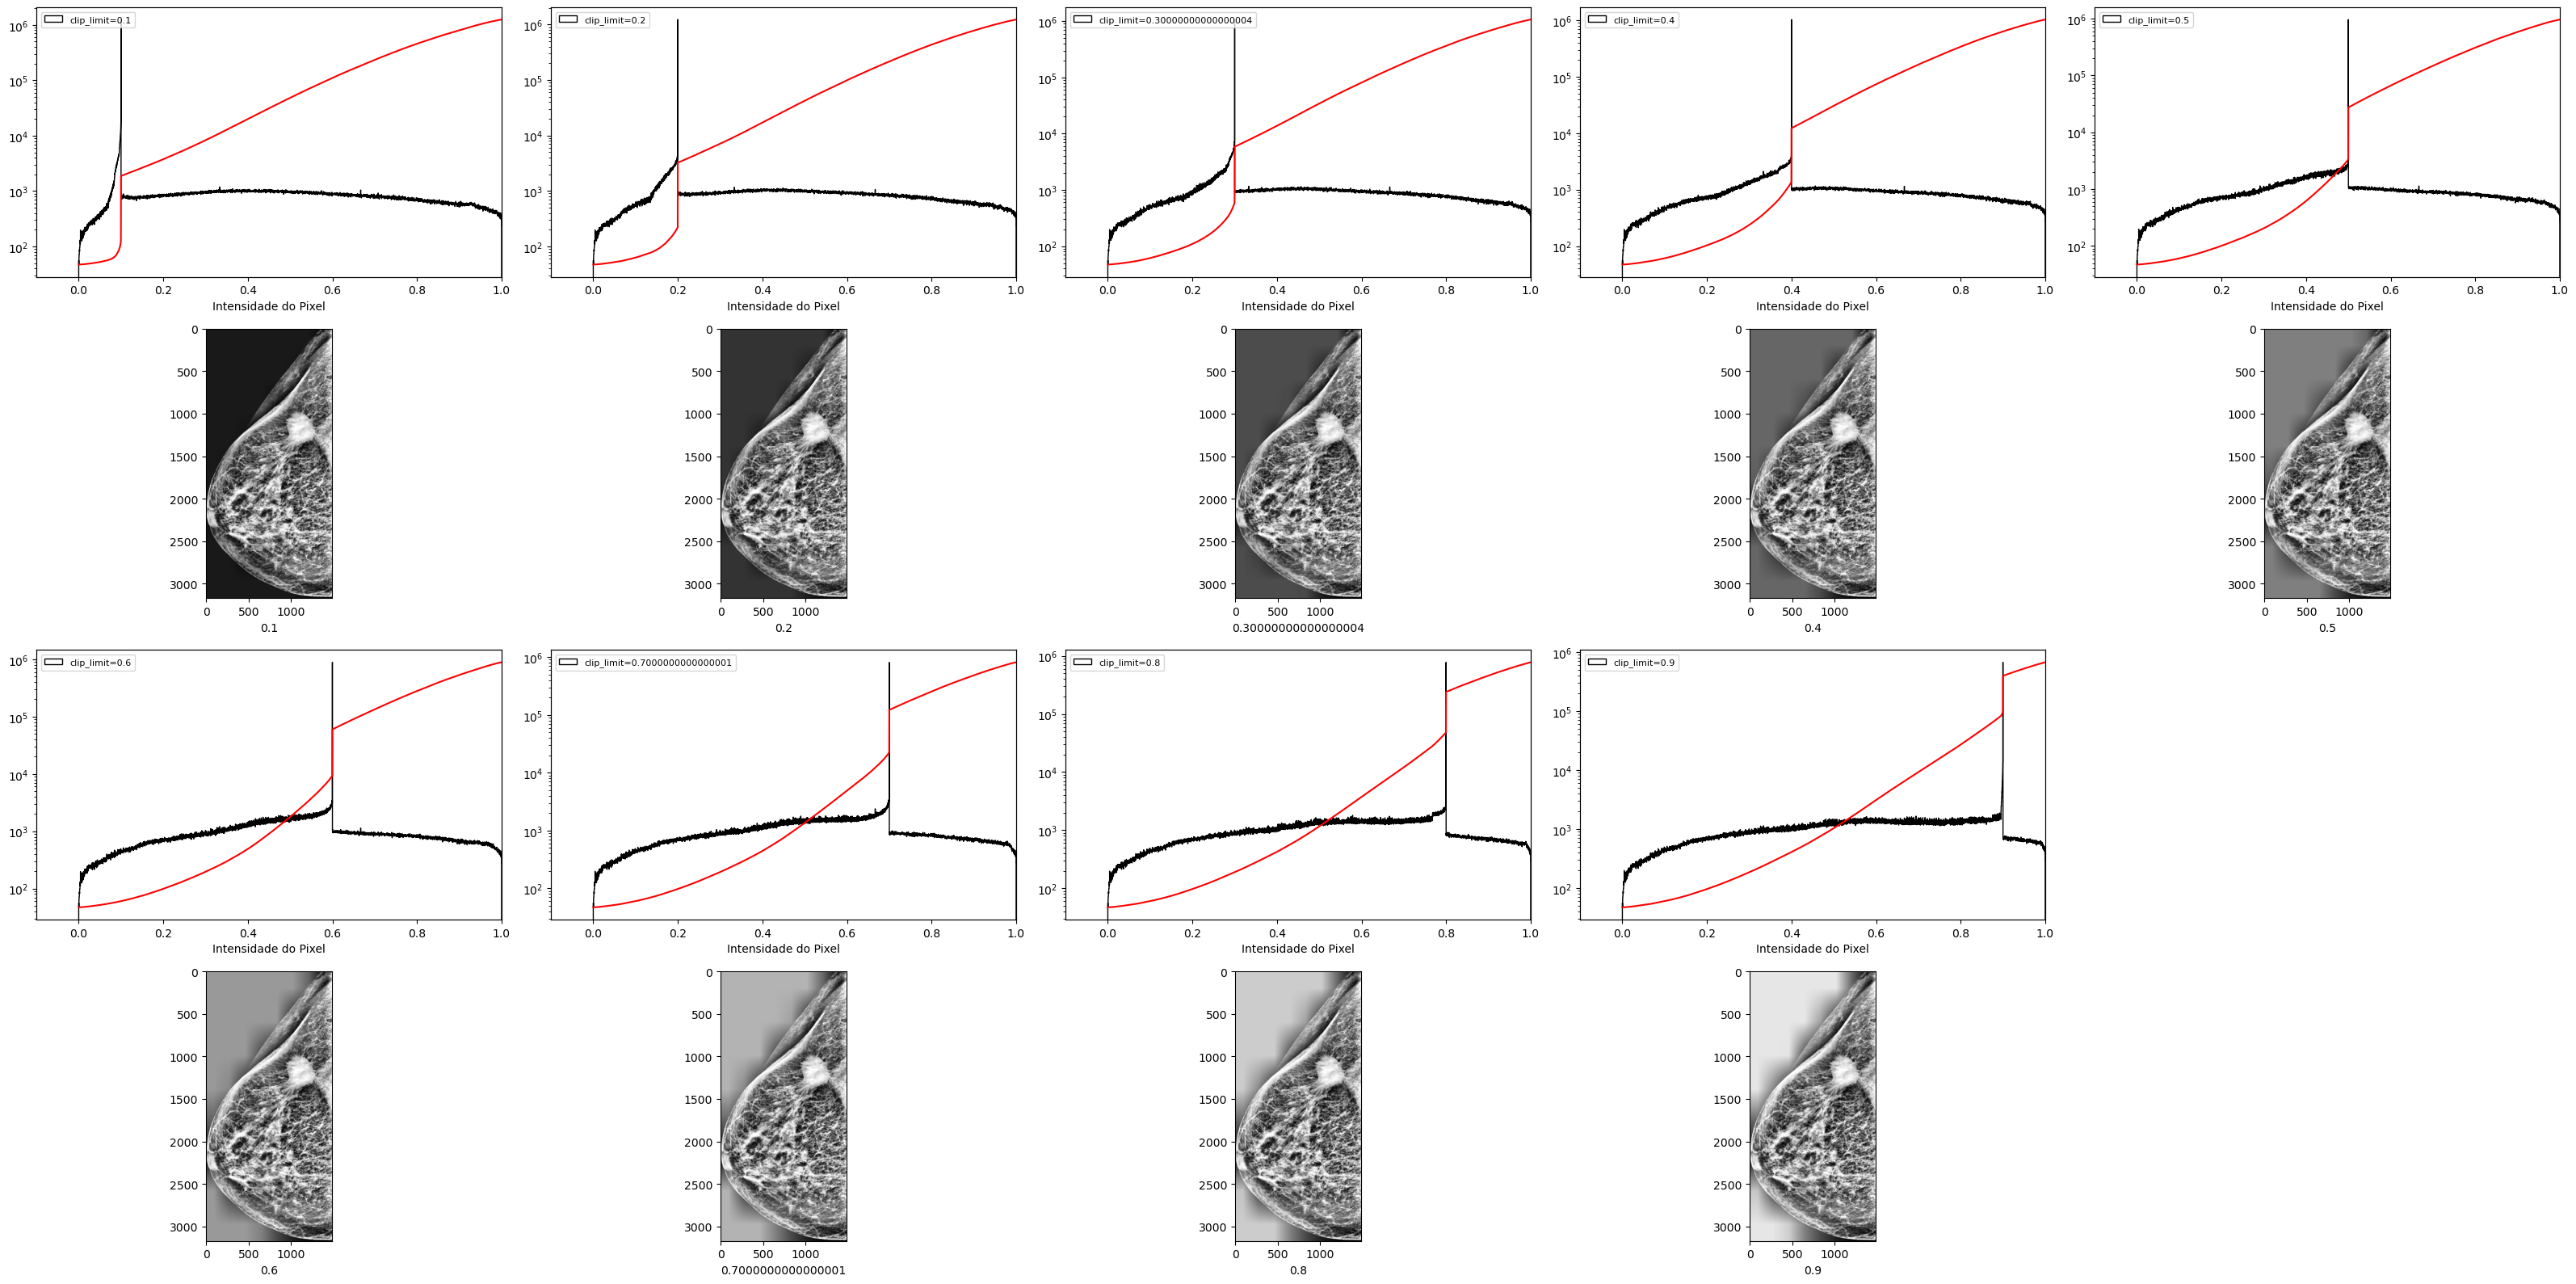

In [64]:
# Queremos ver a diferença para cada limite na equalização adaptativa
figHistograms = plt.figure(figsize=(32,16))
clipLimit = np.arange(0.1, 1, 0.1)

def plot_Hist(fig, increment, image, clip):
    # Display no Histograma da imagem
    ax = fig.add_subplot(4,5,increment)

    axeCdf = ax.twinx()

    ax.hist(image.ravel(), bins=4095, histtype='step', color='black')
    ax.semilogy()
    ax.set_xlabel ('Intensidade do Pixel')
    ax.set_xlim(-0.1, 1)

    # Cumulative Distribution da Imagem
    imgCdf, bins = exposure.cumulative_distribution(image, 4095)
    axeCdf.plot(bins, imgCdf, 'r')
    axeCdf.set_yticks([])
    ax.legend(['clip_limit={0}'.format(clip)], fontsize=8,loc=2)

# Plot de histogramas 1
for i in range(1,6):
    plot_Hist(figHistograms, i, images[i-1],clipLimit[i-1])

# Plot de imagens dos histogramas 1
for i in range(6,11):
    ax = figHistograms.add_subplot(4,5,i)
    ax.imshow(images[i-6], cmap=plt.cm.gray)
    ax.set_xlabel(str(clipLimit[i-6]))

# Plot de histogramas 2
for i in range(12,16):
    plot_Hist(figHistograms, i-1, images[i-7], clipLimit[i-7])

# Plot de imagens dos histogramas 2
for i in range(16,20):
    ax = figHistograms.add_subplot(4,5,i)
    ax.imshow(images[i-11], cmap=plt.cm.gray)
    ax.set_xlabel(str(clipLimit[i-11]))

# Ajusta layout da figura
figHistograms.tight_layout()
